# Titanic - Machine Learning from Disaster

## Overview:
In this notebook, I'll be taking a look into the titanic dataset available on kaggle.

## Purpose:
To get some practice on learning from data and using machine learning for a classification problem.

Data source: https://www.kaggle.com/c/titanic/data

## Steps:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Modeling
5. Rusults

In [181]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importing Dataset

df = pd.read_csv('Data/train.csv')

In [25]:
# Data Dictionary
index = range(0,len(df.columns))
desc = ['Unique Identifier for each passenger','Wether the passenger survived or not',
    'Which class passenger the person was','Name of passenger','Gender of the passenger','Age of the passenger',
    'Number of siblings / spouses aboard','Number of parents / children aboard','Ticket number','Passenger fare',
    'Cabin number','Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton']

dataDict = {
    'Columns' : df.columns,
    'Description' : desc
}

pd.DataFrame(dataDict,index=index)

,Columns,Description
0,PassengerId,Unique Identifier for each passenger
1,Survived,Wether the passenger survived or not
2,Pclass,Which class passenger the person was
3,Name,Name of passenger
4,Sex,Gender of the passenger
5,Age,Age of the passenger
6,SibSp,Number of siblings / spouses aboard
7,Parch,Number of parents / children aboard
8,Ticket,Ticket number
9,Fare,Passenger fare


In [29]:
# Displaying Dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Looking into null values and data types of each column to see which are categorical and numerical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that some of these variables are incorrectly labelled.

Pclass is the ticket class of passengers which represent if the passengers are in 1st, 2nd or 3rd class. This is currently stated as an integer value but should be categorical.

Survived is another numerical column which needs to be converted.

In [35]:
# Changing datatype for Pclass
df['Pclass'] = df['Pclass'].astype(str)
df['Survived'] = df['Survived'].astype(str)

# Seperating numerical variables with categorical variables
df_num = df[['Age','SibSp','Parch','Fare']]

df_cat = df[['PassengerId','Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']]

### Exploring Numerical Variables

In [36]:
df_num.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


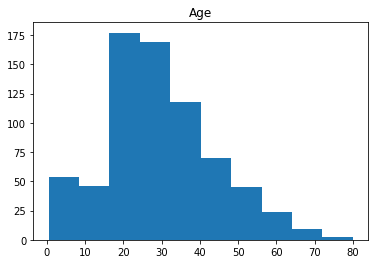

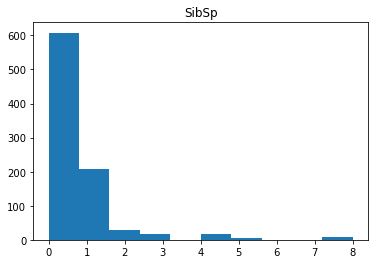

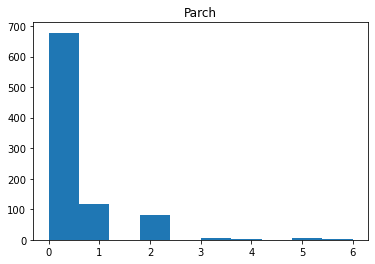

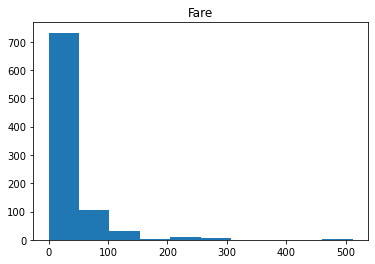

In [38]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

We can see a relatively normal distribution for Age but other variables are quite skewed. Normalization may possibly need to be confucted for Fare.

In [190]:
# Survivors of each passenger class

pclassSurv = pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')
print(pclassSurv)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5, 1.0, 'Count of Survivors per Passenger Class')

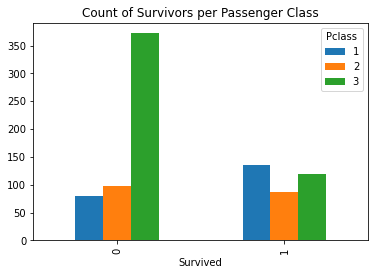

In [191]:
pclassSurv.plot(kind='bar').set_title('Number of Survivors per Passenger Class')

Seems that 1st class passengers were the most to survive followed by the 3rd then 2nd class passengers.

But these numbers means nothing on their own, let's see how they change when we try to see the percentage of survivals for each passenger class.

In [183]:
pClassSurv = pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

for i in range(1,4):

    i = str(i)
    pClassSurv[i] = round(pClassSurv[i]/pClassSurv[i].sum()*100)

print(pClassSurv)

Pclass       1     2     3
Survived                  
0         37.0  53.0  76.0
1         63.0  47.0  24.0


Text(0.5, 1.0, 'Survival Rate per Passenger Class')

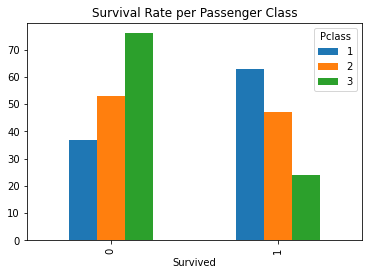

In [192]:
pClassSurv.plot(kind='bar').set_title('Survival Rate per Passenger Class')

The survival rate of 1st class passengers seems to be the highest, but now the least likely to survive are the 3rd class passengers.